In [34]:
import numpy as np
from scipy.io.wavfile import write, read
import librosa
from scipy import signal
from classification.utils.plots import plot_audio, plot_specgram
import matplotlib.pyplot as plt

In [11]:
def resample(x, M=4):
    """
    Applies a low pass filter then downsamples a signal.
    Args:
      x (numpy array): Signal to be downsampled
      M (int):         Downsample factor

    Returns:
      y (numpy array): Downsampled signal
    """
    y = signal.resample(x, int(len(x) / M))
    return y


def specgram(y, Nft=512):
    """
    Computes the spectrogram (frequency over time) of a signal. 
    Args:
      y (numpy array): Audio signal we want to extract its spectogram
      Nft (int): Number of samples by FFT

    Returns:
      stft (numpy matrix): Specgram matrix
    """

    ### TO COMPLETE
    stft = np.abs(librosa.stft(y, n_fft=Nft, hop_length=Nft, window="rect", center=False))
    return stft

def melspecgram(x, Nmel=20, Nft=512, fs=44100, fs_down=11025):
    """Computes the melspecgram (frequency over time) of a signal, with the Mel unit.

    Args:
      x (numpy array): Audio signal 
      Nmel (int): Downsample factor
      Nft (int): Number of samples by FFT
      fs (int): Sample frequency
      fs_down (int): Downsampling frequency

    Returns:
      melspec (numpy matrix): Melspecgram matrix
    """

    ### TO COMPLETE, using the functions resample() and specgram() defined above
    M = fs//fs_down
    y = resample(x,M)
    stft = specgram(y,Nft)
    mels = librosa.filters.mel(sr=fs_down, n_fft=Nft, n_mels=Nmel)
    #mels = mels[:, :-1]
    melspec = mels @ stft

    return melspec

9728
[ 227.60014  978.9244  1738.8986  ...  545.1516   574.3559   678.14307]
1945


(1945, array([ 227,  978, 1738, ...,  545,  574,  678], dtype=int16))

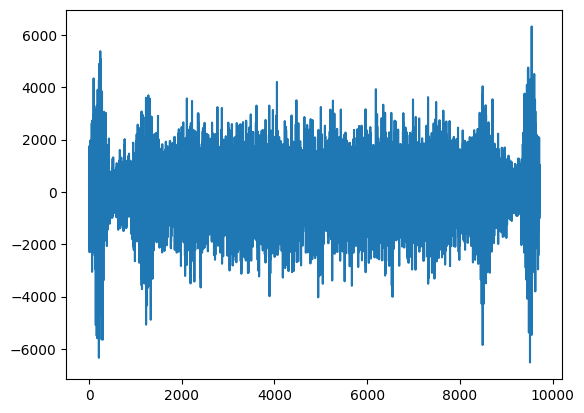

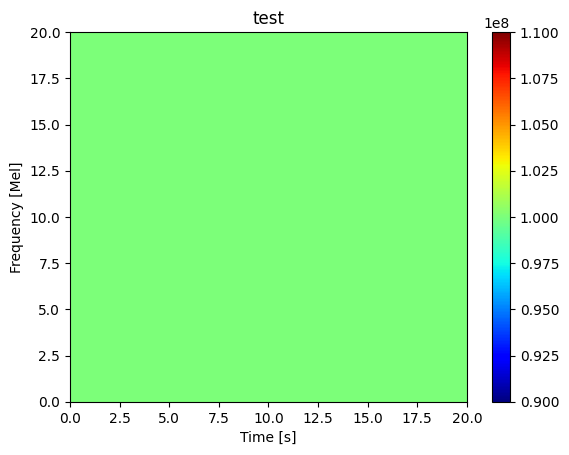

In [45]:
melspec = 100000000*np.ones((20,20))

#melspec = 10000000*np.random.random((20,20))
audio = librosa.feature.inverse.mel_to_audio(melspec)

print(len(audio))

plt.plot(audio)

fig1 = plt.figure()
ax1 = fig1.add_subplot()

plot_specgram(
    melspec, ax=ax1, is_mel=True, title='test'
)

print(audio)

print(int(len(audio)/5))
# Save the audio file
write('output.wav', int(len(audio)/5), audio.astype(np.int16))
read('output.wav')